# ******************** Project *********************

### 19F-0359
### 19F-0325 
                     

## Information About Data
* The original dataset from the reference consists of 5 different folders, each with 100 files, with each file representing a single subject/person. Each file is a recording of brain activity for 23.6 seconds.


* The corresponding time-series is sampled into 4097 data points. Each data point is the value of the EEG recording at a different point in time. So we have total 500 individuals with each has 4097 data points for 23.6 seconds.


##### * We divided and shuffled every 4097 data points into 23 chunks, each chunk contains 178 data points for 1 second, and each data point is the value of the EEG recording at a different point in time.


##### * So now we have 23 x 500 = 11500 pieces of information(row), each information contains 178 data points for 1 second(column), the last column represents the label y {1,2,3,4,5}.


* The response variable is y in column 179, the Explanatory variables X1, X2, ..., X178

* The response variable is y in column 179, the Explanatory variables X1, X2, ..., X178, y contains the category of the 178-dimensional input vector. Specifically, y in {1, 2, 3, 4, 5}:

5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open.

4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed.

3 – Yes, they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area.

2 - They recorder the EEG from the area where the tumor was located.

1 - Recording of seizure activity.


All subjects falling in classes 2, 3, 4, and 5 are subjects who did not have epileptic seizure. Only subjects in class 1 have epileptic seizure.

## Importing libraries


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


## Loading Data


In [2]:
Epilepsy=pd.read_csv("data.csv")
Epilepsy.head()

Unnamed: 0   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X170  X171  \
0  X21.V1.791  135  190  229  223  192  125   55   -9  -33  ...   -17   -15   
1  X15.V1.924  386  382  356  331  320  315  307  272  244  ...   164   150   
2     X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85  ...    57    64   
3   X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87  ...   -82   -81   
4   X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21  ...     4     2   

   X172  X173  X174  X175  X176  X177  X178  y  
0   -31   -77  -103  -127  -116   -83   -51  4  
1   146   152   157   156   154   143   129  1  
2    48    19   -12   -30   -35   -35   -36  5  
3   -80   -77   -85   -77   -72   -69   -65  5  
4   -12   -32   -41   -65   -83   -89   -73  5  

[5 rows x 180 columns]

## Exploratory Data Analysis

In [3]:
Epilepsy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed: 0 to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [4]:
Epilepsy.shape

(11500, 180)

In [5]:
y=Epilepsy.iloc[:,179].values # isolating the last column as it contains who has epilipsy and who doesn't
y

array([4, 1, 5, ..., 5, 3, 4], dtype=int64)

In [6]:

cols = Epilepsy.columns 
tgt = Epilepsy.y
tgt[tgt > 1] = 0 # Convert the target variable to binary

# Set the x and y parameters of the countplot
ax = sns.countplot(x=tgt, label="Count")

# Get the value counts of the target variable
non_seizure, seizure = tgt.value_counts()

# Print the number of trials for each class
print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

# Show the plot
plt.show()

C:\Users\Zaid\AppData\Local\Temp\ipykernel_14216\1182012561.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tgt[tgt > 1] = 0 # Convert the target variable to binary


The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


In [7]:
seizure_index_list = [] # list of seizured patient index 
normal_index_list = [] # list of normal patient index
for i in range(len(y)):  # 0 to 11500
    if (y[i] == 1):
        seizure_index_list.append(i)
    else:
        normal_index_list.append(i)

X = Epilepsy.iloc[:,1:179].values #converting thedataframe to matrix

#### Ploting the Seizure and non seizure data

In [8]:

plt.figure(figsize=(10,10))


# for the seizure patients
for i in range(5):
    plt.subplot(5,2,2*i+1)
    plt.title('Seizure EEG' if i == 0 else '')
    plt.plot(X[seizure_index_list[i],:])
    plt.ylabel('uV')


# for the non seizure patient

for i in range(5):
    plt.subplot(5,2,2*i+2)
    plt.title('Normal EEG' if i == 0 else '')
    plt.plot(X[normal_index_list[i],:])
    plt.xlabel('Samples')

plt.tight_layout()


In [9]:
Epilepsy.isna().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
             ..
X175          0
X176          0
X177          0
X178          0
y             0
Length: 180, dtype: int64

In [10]:
Epilepsy.describe() #checking mean median std etc in data 

X1            X2            X3            X4            X5  \
count  11500.000000  11500.000000  11500.000000  11500.000000  11500.000000   
mean     -11.581391    -10.911565    -10.187130     -9.143043     -8.009739   
std      165.626284    166.059609    163.524317    161.269041    160.998007   
min    -1839.000000  -1838.000000  -1835.000000  -1845.000000  -1791.000000   
25%      -54.000000    -55.000000    -54.000000    -54.000000    -54.000000   
50%       -8.000000     -8.000000     -7.000000     -8.000000     -8.000000   
75%       34.000000     35.000000     36.000000     36.000000     35.000000   
max     1726.000000   1713.000000   1697.000000   1612.000000   1518.000000   

                 X6            X7           X8           X9           X10  \
count  11500.000000  11500.000000  11500.00000  11500.00000  11500.000000   
mean      -7.003478     -6.502087     -6.68713     -6.55800     -6.168435   
std      161.328725    161.467837    162.11912    162.03336    160.436352   
min    -1757.000000  -1832.000000  -1778.00000  -1840.00000  -1867.000000   
25%      -54.000000    -54.000000    -55.00000    -55.00000    -54.000000   
50%       -8.000000     -8.000000     -8.00000     -7.00000     -7.000000   
75%       36.000000     35.000000     36.00000     36.00000     35.250000   
max     1816.000000   2047.000000   2047.00000   2047.00000   2047.000000   

       ...          X170          X171          X172          X173  \
count  ...  11500.000000  11500.000000  11500.000000  11500.000000   
mean   ...    -10.145739    -11.630348    -12.943478    -13.668870   
std    ...    164.652883    166.149790    168.554058    168.556486   
min    ...  -1867.000000  -1865.000000  -1642.000000  -1723.000000   
25%    ...    -55.000000    -56.000000    -56.000000    -56.000000   
50%    ...     -9.000000    -10.000000    -10.000000    -10.000000   
75%    ...     34.000000     34.000000     33.000000     33.000000   
max    ...   1777.000000   1472.000000   1319.000000   1436.000000   

               X174          X175          X176          X177          X178  \
count  11500.000000  11500.000000  11500.000000  11500.000000  11500.000000   
mean     -13.363304    -13.045043    -12.705130    -12.426000    -12.195652   
std      167.257290    164.241019    162.895832    162.886311    164.852015   
min    -1866.000000  -1863.000000  -1781.000000  -1727.000000  -1829.000000   
25%      -55.000000    -56.000000    -55.000000    -55.000000    -55.000000   
50%      -10.000000     -9.000000     -9.000000     -9.000000     -9.000000   
75%       34.000000     34.000000     34.000000     34.000000     34.000000   
max     1733.000000   1958.000000   2047.000000   2047.000000   1915.000000   

                  y  
count  11500.000000  
mean       0.200000  
std        0.400017  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 179 columns]

# Machine Learning models

In [11]:
from sklearn.model_selection import train_test_split#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, shuffle=True)
#shuffle is true so that the data is shuffled before splitting

In [12]:
from sklearn.preprocessing import StandardScaler# Feature Scaling
sc = StandardScaler()# Fit only to the training data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)# Apply transform to both the training set and the test set.


### SVM

In [13]:
# Support Vector Classifier
from sklearn.svm import SVC
# Create classifier instance
svc_clf = SVC()
# Fit to train data
svc_clf.fit(X_train, y_train)


# Evaluate on train data
train_acc_svc =  svc_clf.score(X_train, y_train)
print("Train accuracy of SVM:", round(train_acc_svc * 100, 2), "%") # Round the acc to 2 number after the decimal point

# Evaluate on test data
test_acc_svc = svc_clf.score(X_test, y_test)
print("Test accuracy of SVM:", round(test_acc_svc *100, 2), "%") # Round the acc to 2 number after the decimal point

Train accuracy of SVM: 98.16 %
Test accuracy of SVM: 97.83 %


In [14]:
# Prediction for all test samples
y_pred_svc = svc_clf.predict(X_test)
print(y_pred_svc)
print(y_pred_svc.shape)

[0 0 0 ... 0 1 0]
(2300,)


Prediction: [0]
Ground truth: 0


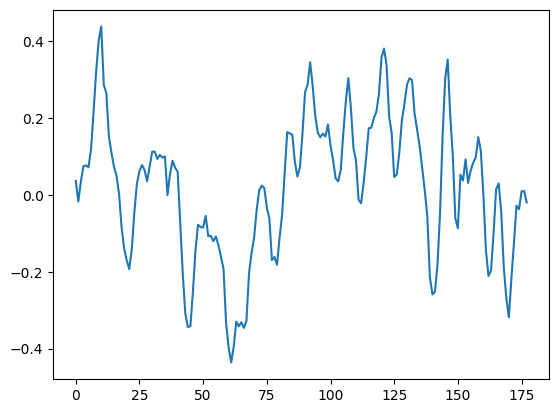

In [15]:
# Prediction for a sample
index = 0
# Plot sample
plt.plot(X_test[index])
# Create sample
X_one_sample = np.expand_dims(X_test[index], 0)

# Predict
y_pred_svc_one_sample = svc_clf.predict(X_one_sample)
print("Prediction:", y_pred_svc_one_sample) 
print("Ground truth:", y_test[index])

##### Confusion matrix for SVM

[[1821   14]
 [  36  429]]


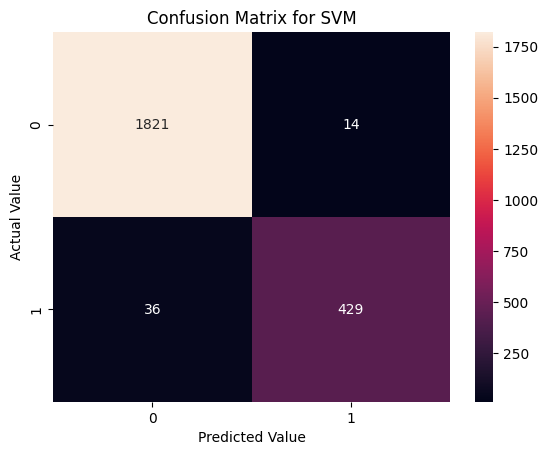

In [32]:
import sklearn.metrics as Confusion_metric
# Create confusion matrix
cm = Confusion_metric.confusion_matrix(y_test, y_pred_svc)
# Print confusion matrix
print(cm)

# Create heatmap with annotations
sns.heatmap(cm, annot=True, fmt="d")
# Set labels for y-axis and x-axis
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')

# Set title for the heatmap
plt.title('Confusion Matrix for SVM')

# Show the plot
plt.show()

### Decissoin tree Classifier

In [17]:
#Decissoin tree Classifier
from sklearn.tree import DecisionTreeClassifier
# Create classifier instance
dtc_clf = DecisionTreeClassifier()
# Fit to train data
dtc_clf.fit(X_train, y_train)
# Evaluate on train data
train_acc_decision_tree =  dtc_clf.score(X_train, y_train)
print("Train accuracy of decision tree:", round(train_acc_decision_tree * 100, 2), "%") # Round the acc to 2 number after the decimal point
# Evaluate on test data
test_acc_decision_tree = dtc_clf.score(X_test, y_test)
print("Test accuracy of decision tree:", round(test_acc_decision_tree *100, 2), "%") # Round the acc to 2 number after the decimal point

Train accuracy of decision tree: 100.0 %
Test accuracy of decision tree: 94.09 %


In [18]:
# Prediction for all test samples
y_pred_dtc = dtc_clf.predict(X_test)
print(y_pred_dtc)
print(y_pred_svc.shape)

[0 0 0 ... 0 1 0]
(2300,)


Prediction: [1]
Ground truth: 1


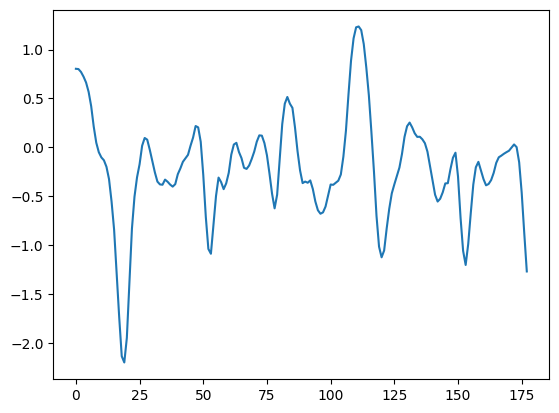

In [19]:
# Prediction for a sample
index = 9
# Plot sample
plt.plot(X_test[index])
# Create sample
X_one_sample = np.expand_dims(X_test[index], 0)

# Predict
y_pred_dtc_one_sample = dtc_clf.predict(X_one_sample)
print("Prediction:", y_pred_dtc_one_sample) 
print("Ground truth:", y_test[index])

##### Confusion Matrix For Decision Tree

[[1779   56]
 [  80  385]]


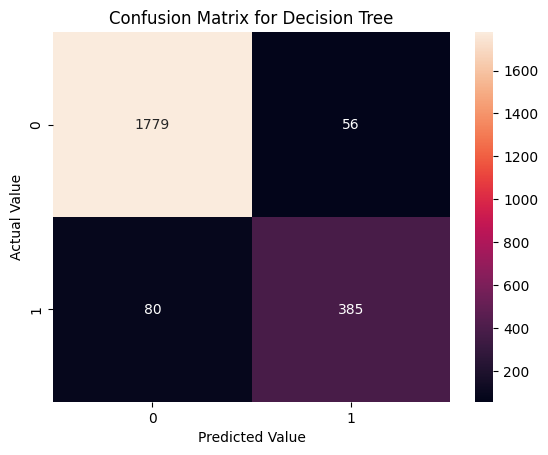

In [33]:
import sklearn.metrics as Confusion_metric
# Create confusion matrix
cm = Confusion_metric.confusion_matrix(y_test, y_pred_dtc)
# Print confusion matrix
print(cm)

# Create heatmap with annotations
sns.heatmap(cm, annot=True, fmt="d")
# Set labels for y-axis and x-axis
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')

# Set title for the heatmap
plt.title('Confusion Matrix for Decision Tree')

# Show the plot
plt.show()

### Random Forest Model

In [20]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
# Create classifier instance
rfc_clf = RandomForestClassifier()
# Fit to train data
rfc_clf.fit(X_train, y_train)
# Evaluate on train data
train_acc_random_forest =  rfc_clf.score(X_train, y_train)
print("Train accuracy of random forest:", round(train_acc_random_forest * 100, 2), "%") # Round the acc to 2 number after the decimal point
# Evaluate on test data
test_acc_random_forest = rfc_clf.score(X_test, y_test)
print("Test accuracy of random forest:", round(test_acc_random_forest *100, 2), "%") # Round the acc to 2 number after the decimal point

Train accuracy of random forest: 100.0 %
Test accuracy of random forest: 97.96 %


In [21]:
# Prediction for all test samples
y_pred_rfc = rfc_clf.predict(X_test)
print(y_pred_rfc)
print(y_pred_rfc.shape)

[0 0 0 ... 0 1 0]
(2300,)


Prediction: [0]
Ground truth: 1


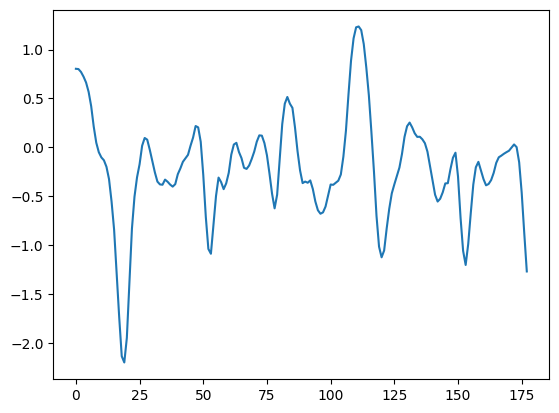

In [22]:
# Prediction for a sample
index = 9

# Plot sample
plt.plot(X_test[index])
# Create sample
X_one_sample = np.expand_dims(X_test[index], 0)

# Predict
y_pred_rfc_one_sample = rfc_clf.predict(X_one_sample)
print("Prediction:", y_pred_rfc_one_sample)
print("Ground truth:", y_test[index])

##### Confusion Matrix for Random Forest 

[[1816   19]
 [  28  437]]


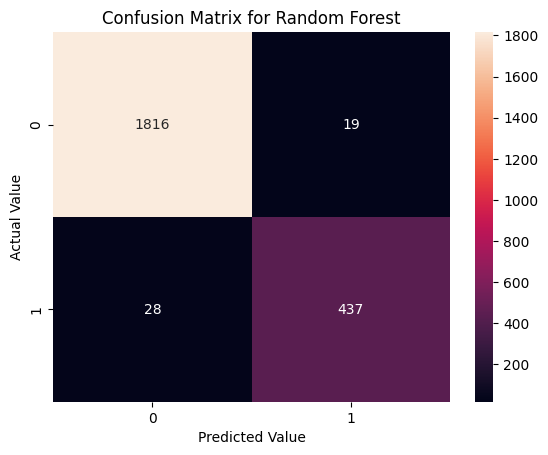

In [35]:
import sklearn.metrics as Confusion_metric
# Create confusion matrix
cm = Confusion_metric.confusion_matrix(y_test, y_pred_rfc)
# Print confusion matrix
print(cm)

# Create heatmap with annotations
sns.heatmap(cm, annot=True, fmt="d")
# Set labels for y-axis and x-axis
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')

# Set title for the heatmap
plt.title('Confusion Matrix for Random Forest')

# Show the plot
plt.show()

### KNN

In [23]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
# Fit to train data
knn_classifier.fit(X_train, y_train)
# Evaluate on train data

train_acc_knn =  knn_classifier.score(X_train, y_train)# Evaluate on train data

print("Train accuracy of knn classifier:", round(train_acc_random_forest * 100, 2), "%") # Round the acc to 2 number after the decimal point
# Evaluate on test data
test_acc_knn = knn_classifier.score(X_test, y_test)
print("Test accuracy of knn classifier:", round(test_acc_random_forest *100, 2), "%") # Round the acc to 2 number after the decimal point

Train accuracy of knn classifier: 100.0 %
Test accuracy of knn classifier: 97.96 %


In [24]:
# Prediction for all test samples
y_pred_knn_classifier = knn_classifier.predict(X_test)
print(y_pred_knn_classifier)
print(y_pred_knn_classifier.shape)

[0 0 0 ... 0 1 0]
(2300,)


Prediction: [0]
Ground truth: 1


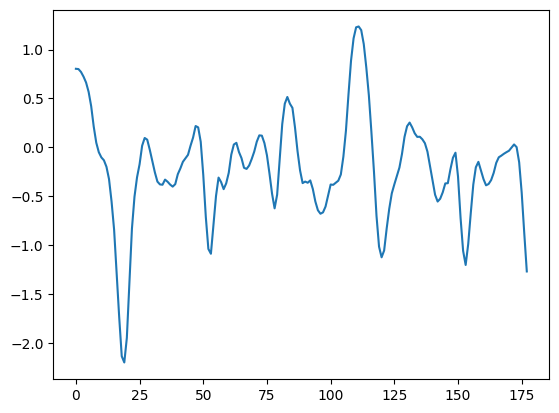

In [25]:
# Prediction for a sample
index = 9

# Plot sample
plt.plot(X_test[index])
# Create sample
X_one_sample = np.expand_dims(X_test[index], 0)

# Predict
y_pred_y_pred_knn_classifier_one_sample = rfc_clf.predict(X_one_sample)
print("Prediction:", y_pred_y_pred_knn_classifier_one_sample) 
print("Ground truth:", y_test[index])

##### Confusion Matrix for KNN

[[1833    2]
 [ 170  295]]


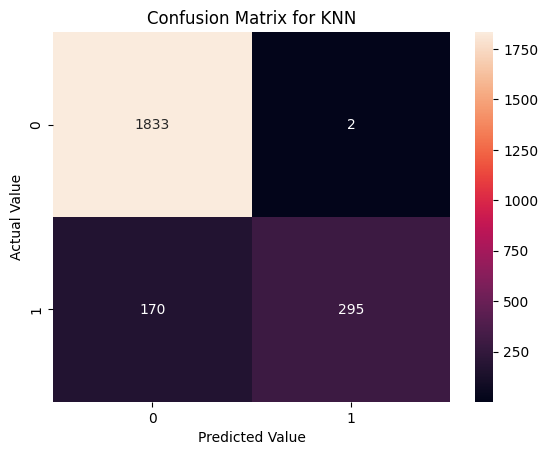

In [36]:
import sklearn.metrics as Confusion_metric
# Create confusion matrix
cm = Confusion_metric.confusion_matrix(y_test, y_pred_knn_classifier)
# Print confusion matrix
print(cm)

# Create heatmap with annotations
sns.heatmap(cm, annot=True, fmt="d")
# Set labels for y-axis and x-axis
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')

# Set title for the heatmap
plt.title('Confusion Matrix for KNN')

# Show the plot
plt.show()